<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [4]:
# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    if file not in ['/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv', '/content/drive/MyDrive/p1_exposure/p1_p2_avg_ccri.csv','/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv']:

        df = pd.read_csv(file, index_col=None, header=0)
        filename_only = file.split('/')[-1]
        first_two_words = '_'.join(filename_only.split('_')[:2])
        print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


heatwave_frequency: 907934526.4321522
heatwave_duration: 1318360284.5762253
heatwave_severity: 290974479.8475279
river_flood: 297879128.3216822
coastal_flood: 27526633.30216878
pluvial_flood: 1202239777.21627
tropical_storm: 567918825.2505157
drought_sma: 7189625.894741088
drought_spi: 13098742.377772804
extreme_heat: 744145385.4944415
fire_FRP: 35400712.848008156
fire_frequency: 31470590.03526491
sand_dust: 112704210.91322182
air_pollution: 1978443302.5670729
vectorborne_malariapv: 538861189.8262048
vectorborne_malariapf: 605975725.6702579
agricultural_drought: 1401882163.9744616


Hazard data normalization test with plots

In [5]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [6]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : heatwave_frequency min: 0.1 max: 8.242208888382612
heatwave_frequency: Log Transformation and Scaling - skew=-0.529, kurtosis=-1.353
IQR processed : heatwave_frequency min: -9.121917797132385 max: 15.469862995220641


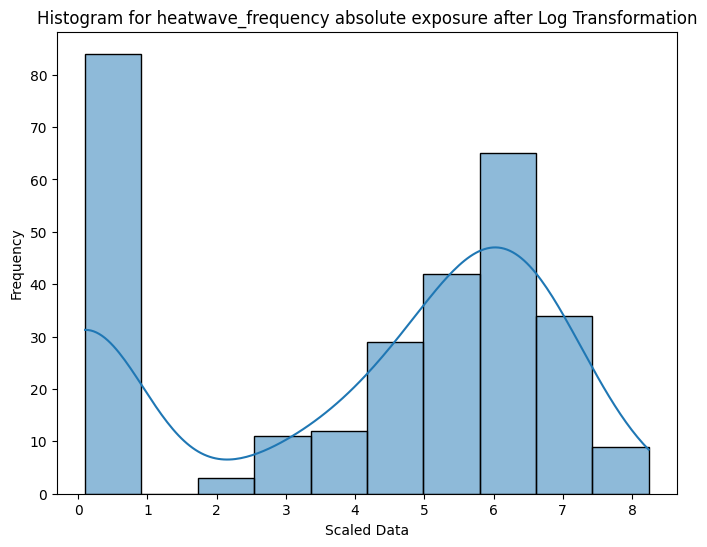

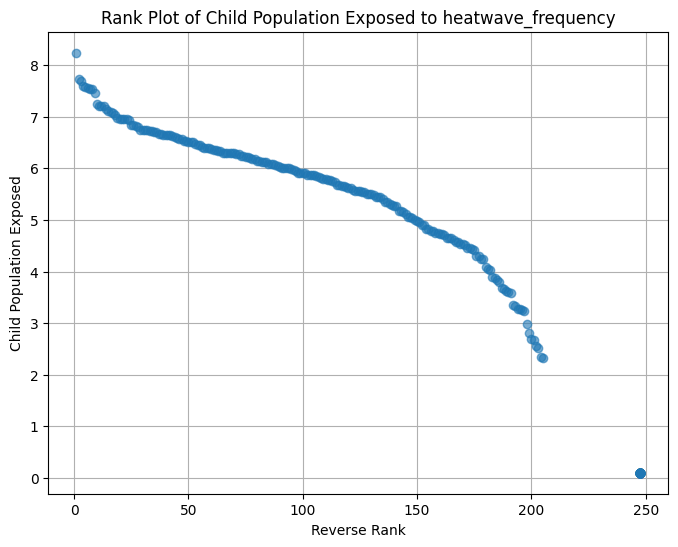

processed : heatwave_duration min: 0.1 max: 8.406198604340677
heatwave_duration: Log Transformation and Scaling - skew=-0.460, kurtosis=-1.425
IQR processed : heatwave_duration min: -9.2106779897525 max: 15.6177966495875


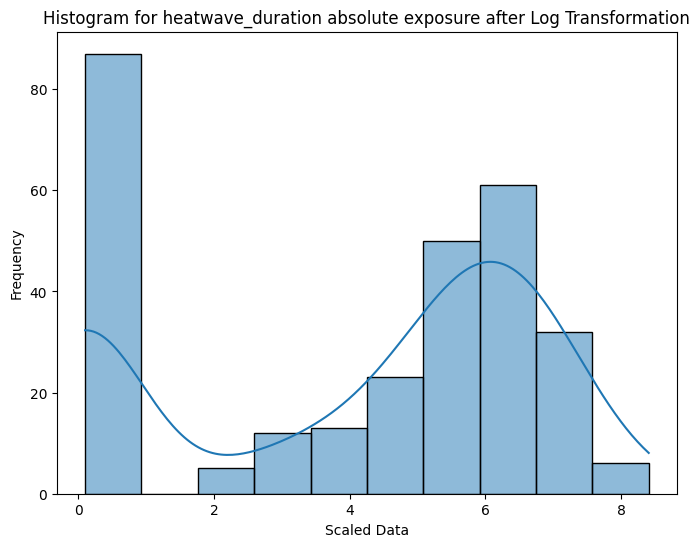

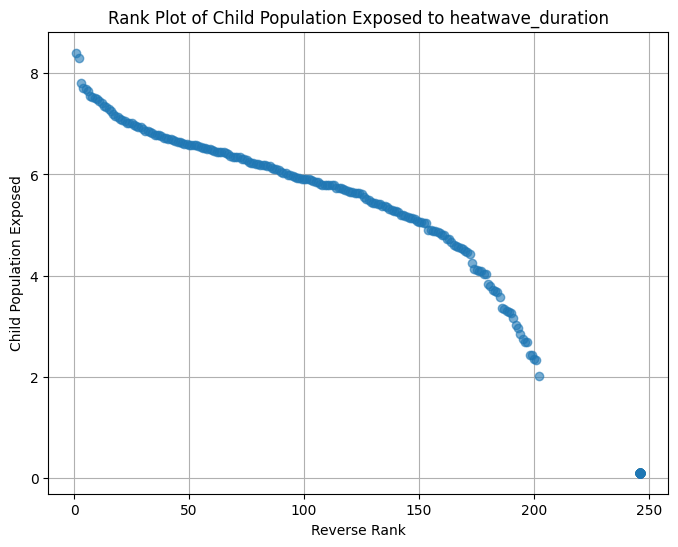

processed : heatwave_severity min: 0.1 max: 7.747777837300412
heatwave_severity: Log Transformation and Scaling - skew=0.878, kurtosis=-1.079
IQR processed : heatwave_severity min: -7.47566352857077 max: 12.726105880951284


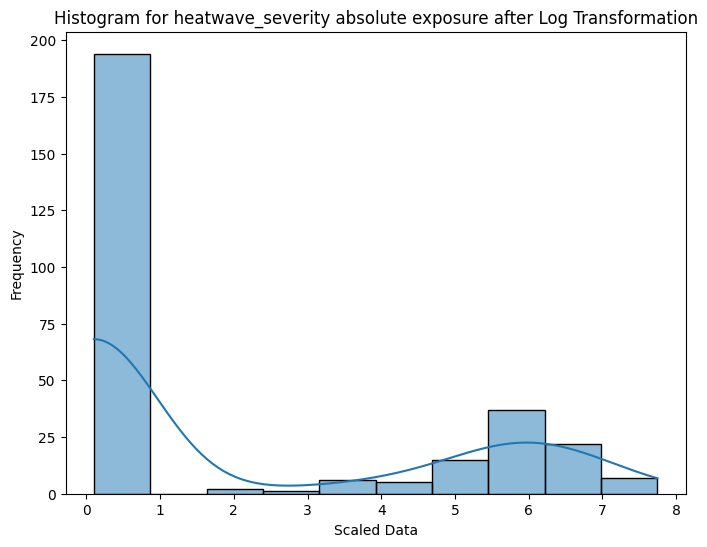

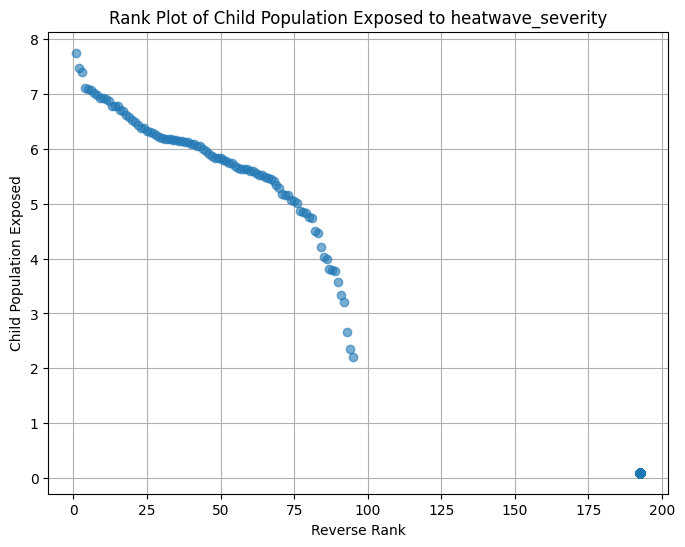

processed : river_flood min: 0.1 max: 7.810106640317287
river_flood: Log Transformation and Scaling - skew=-0.107, kurtosis=-1.688
IQR processed : river_flood min: -7.710375747925003 max: 13.117292913208338


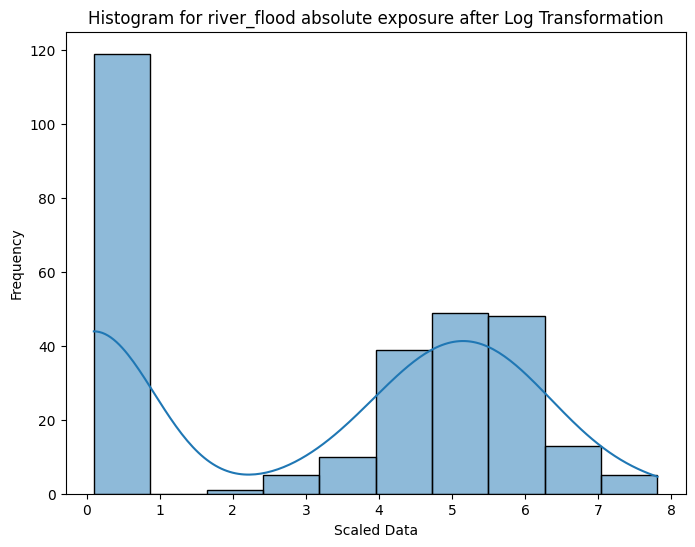

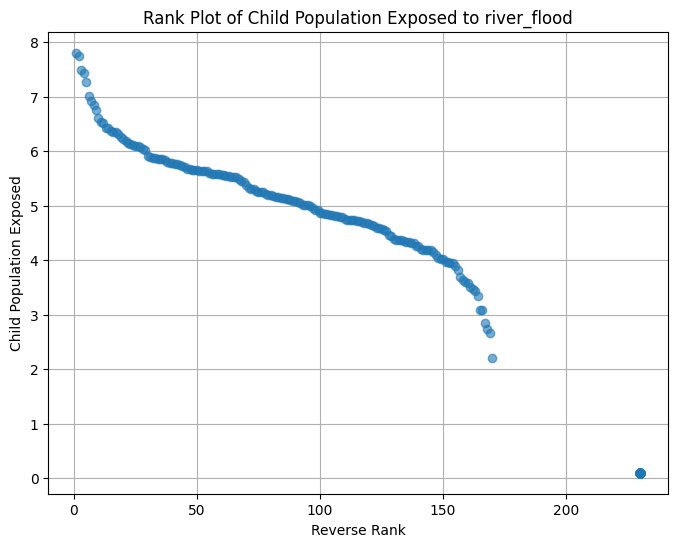

processed : coastal_flood min: 0.1 max: 7.056632617270453
coastal_flood: Log Transformation and Scaling - skew=0.466, kurtosis=-1.160
IQR processed : coastal_flood min: -5.038898450921621 max: 8.664830751536034


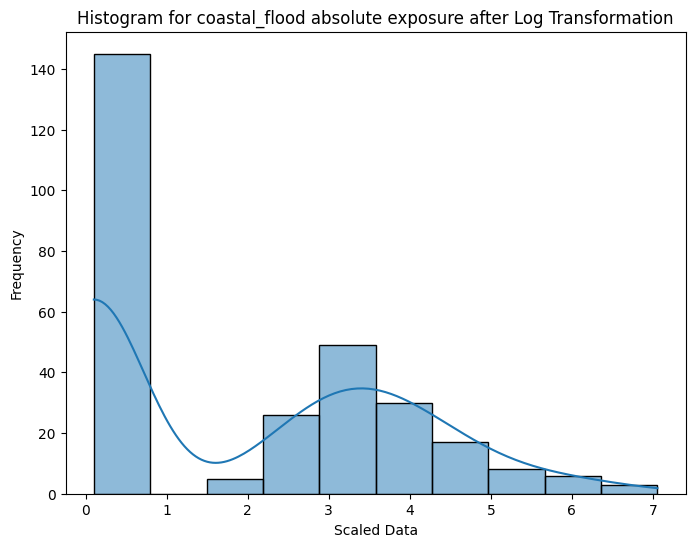

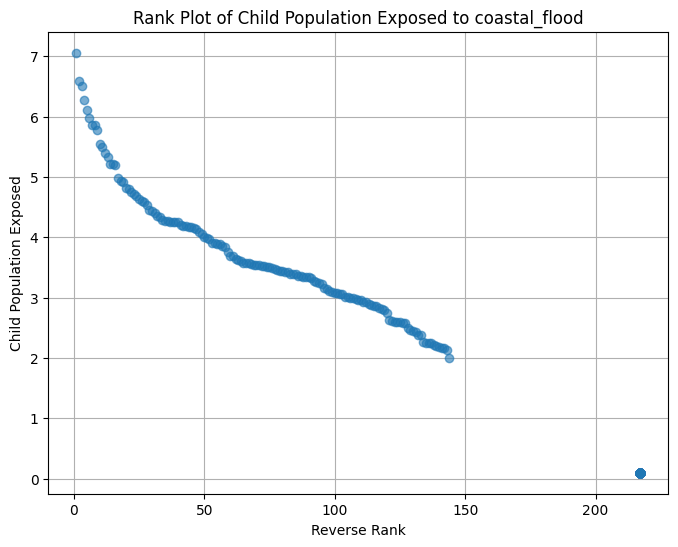

processed : pluvial_flood min: 0.1 max: 8.412208238420407
pluvial_flood: Log Transformation and Scaling - skew=-0.597, kurtosis=-1.237
IQR processed : pluvial_flood min: -9.234087884127165 max: 15.656813140211941


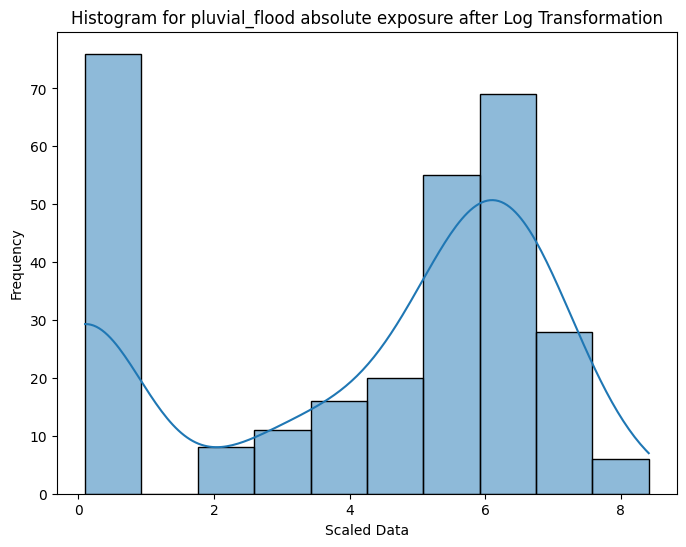

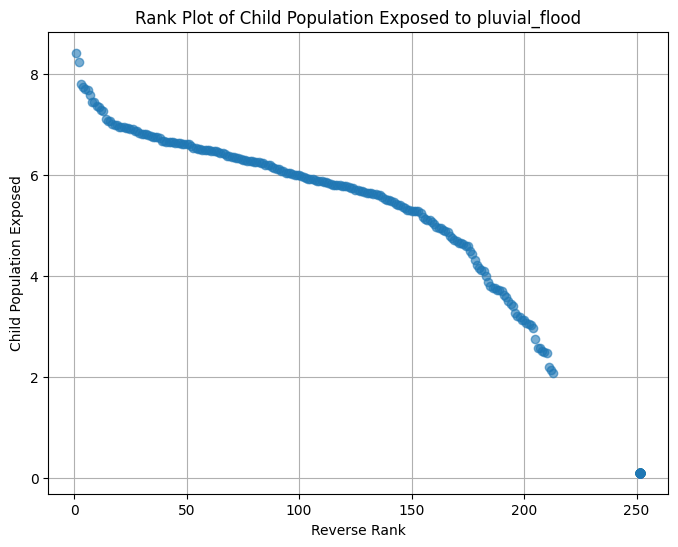

processed : tropical_storm min: 0.1 max: 8.129676560531612
tropical_storm: Log Transformation and Scaling - skew=0.720, kurtosis=-1.140
IQR processed : tropical_storm min: -6.651549079158439 max: 11.352581798597399


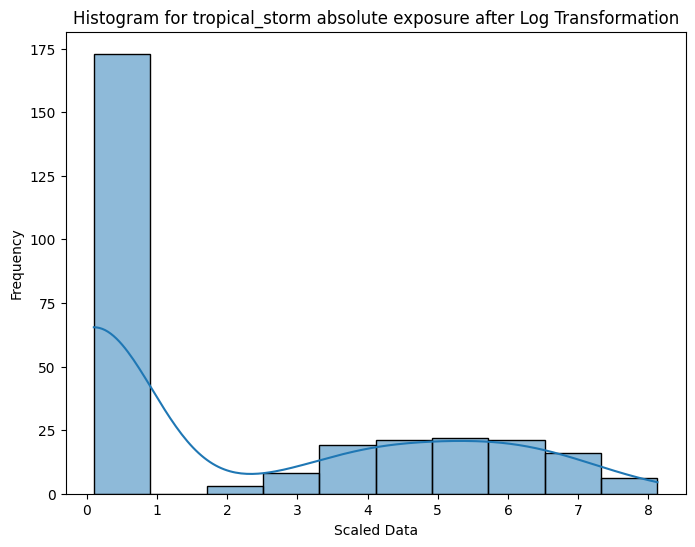

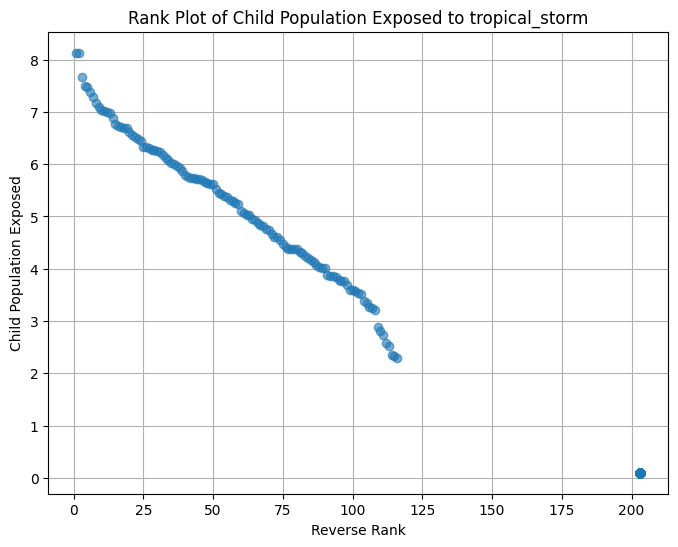

processed : drought_sma min: 0.1 max: 5.96388777125369
drought_sma: Log Transformation and Scaling - skew=1.969, kurtosis=2.162
IQR processed : drought_sma min: 0.1 max: 0.1


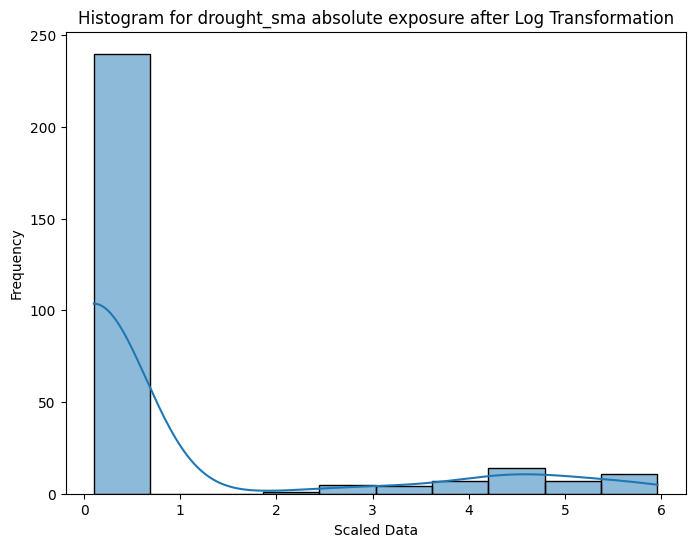

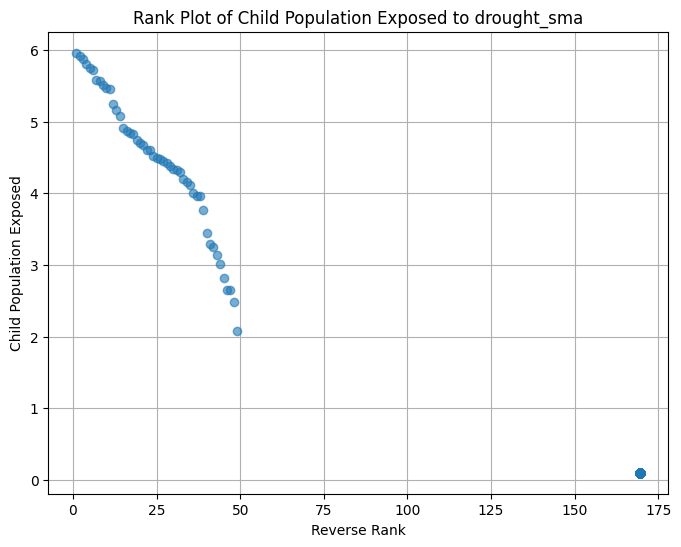

processed : drought_spi min: 0.1 max: 6.622901551507607
drought_spi: Log Transformation and Scaling - skew=1.621, kurtosis=1.041
IQR processed : drought_spi min: 0.1 max: 0.1


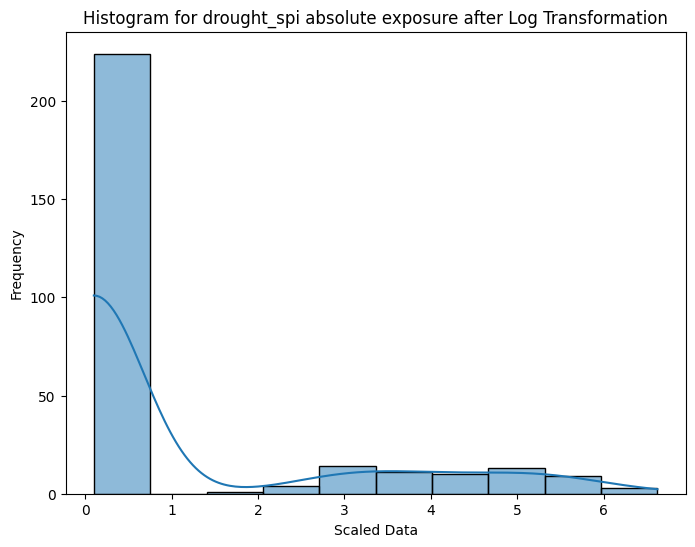

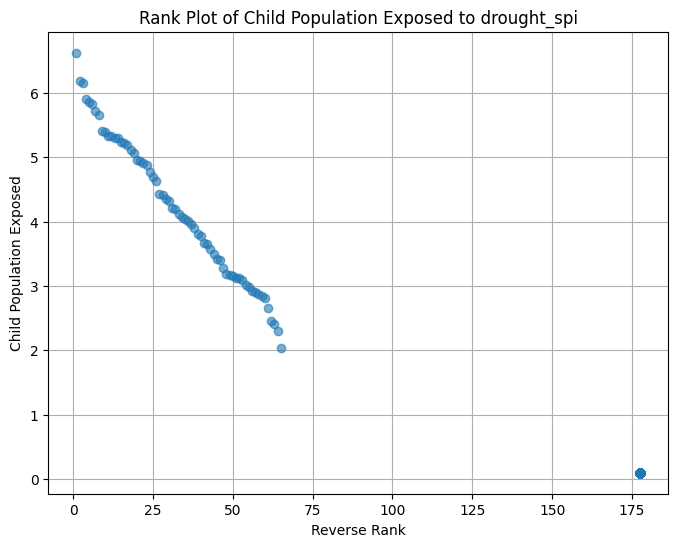

processed : extreme_heat min: 0.1 max: 8.492146256728619
extreme_heat: Log Transformation and Scaling - skew=0.715, kurtosis=-1.319
IQR processed : extreme_heat min: -7.827922355171893 max: 13.313203925286487


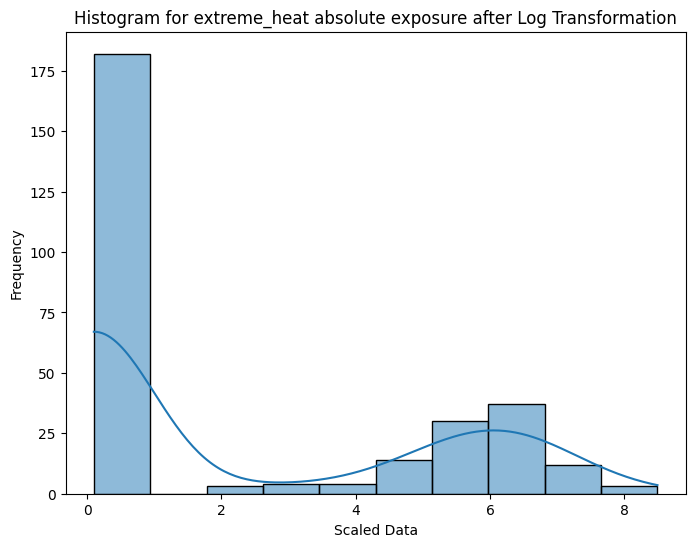

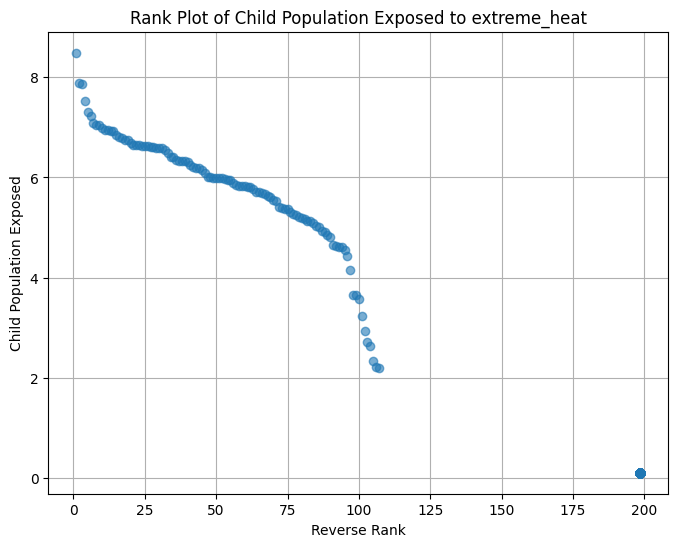

processed : fire_FRP min: 0.1 max: 6.459802770488782
fire_FRP: Log Transformation and Scaling - skew=-0.147, kurtosis=-1.672
IQR processed : fire_FRP min: -7.044246035062856 max: 12.00707672510476


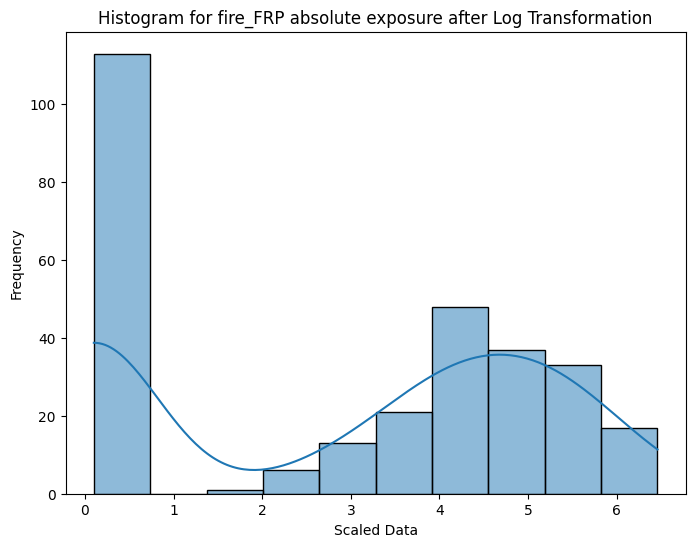

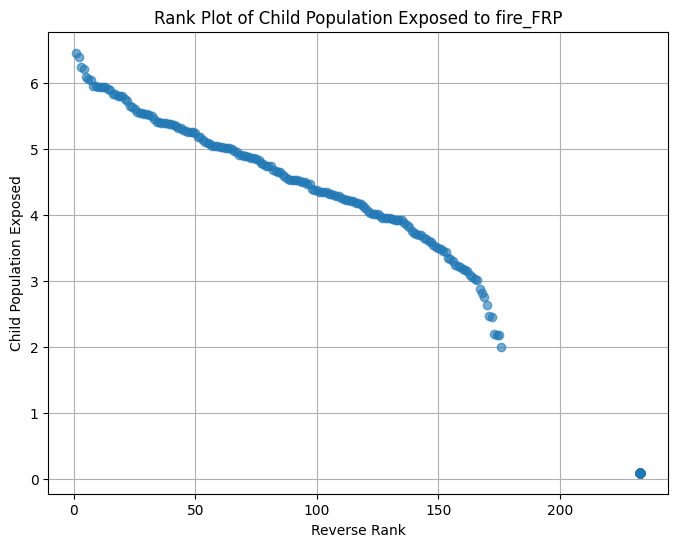

processed : fire_frequency min: 0.1 max: 6.924853998418833
fire_frequency: Log Transformation and Scaling - skew=0.397, kurtosis=-1.470
IQR processed : fire_frequency min: -6.07150601113052 max: 10.385843351884198


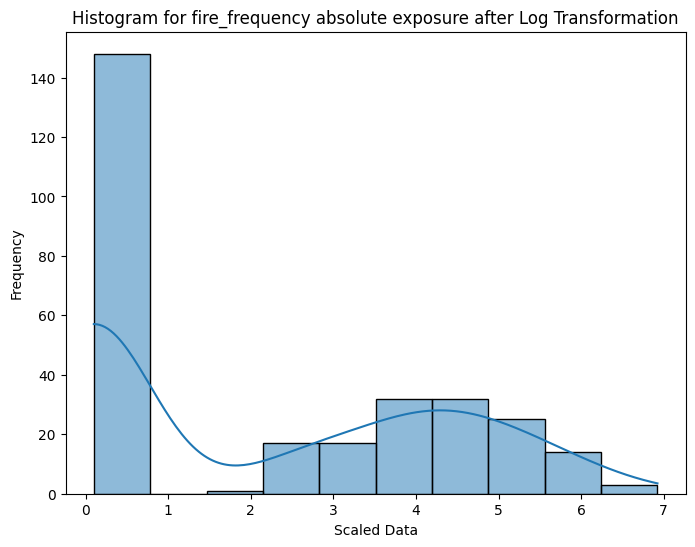

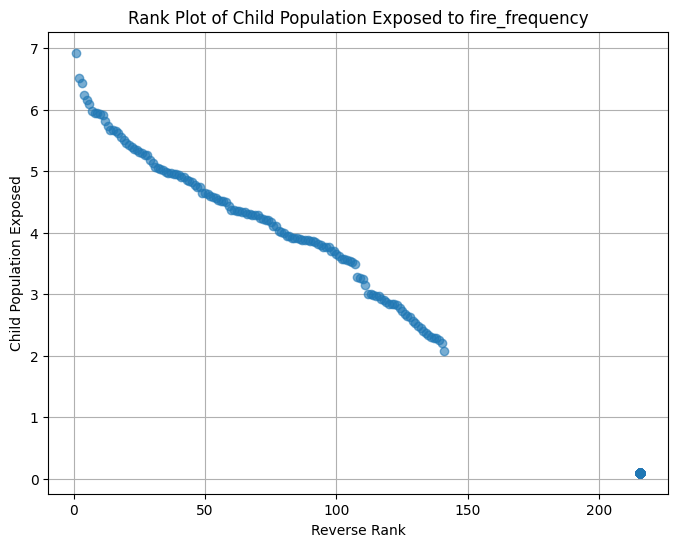

processed : sand_dust min: 0.1 max: 7.142609347734547
sand_dust: Log Transformation and Scaling - skew=0.414, kurtosis=-1.318
IQR processed : sand_dust min: -6.490302264184721 max: 11.083837106974535


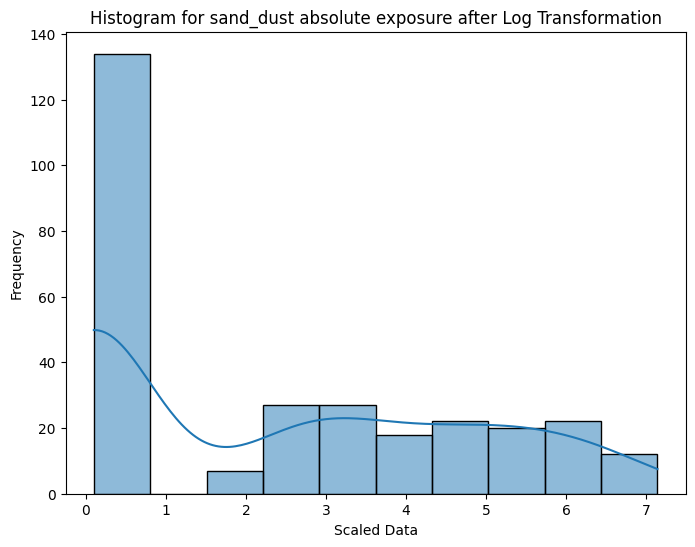

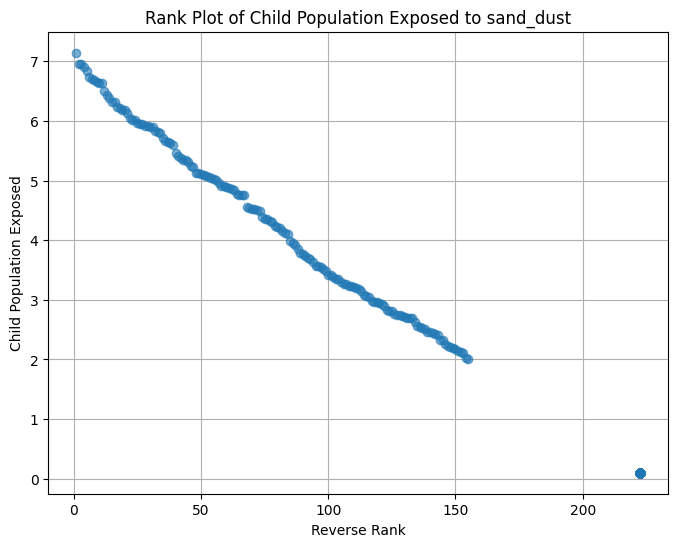

processed : air_pollution min: 0.1 max: 8.563095002934322
air_pollution: Log Transformation and Scaling - skew=-0.751, kurtosis=-0.915
IQR processed : air_pollution min: -2.46557279100649 max: 12.125167724455538


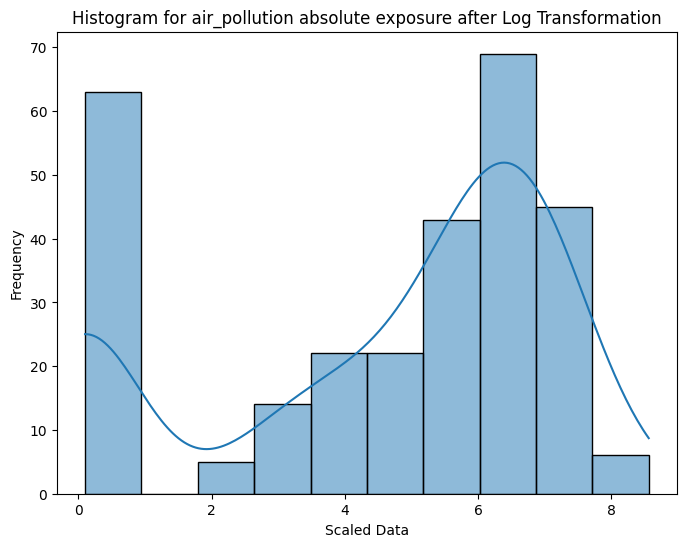

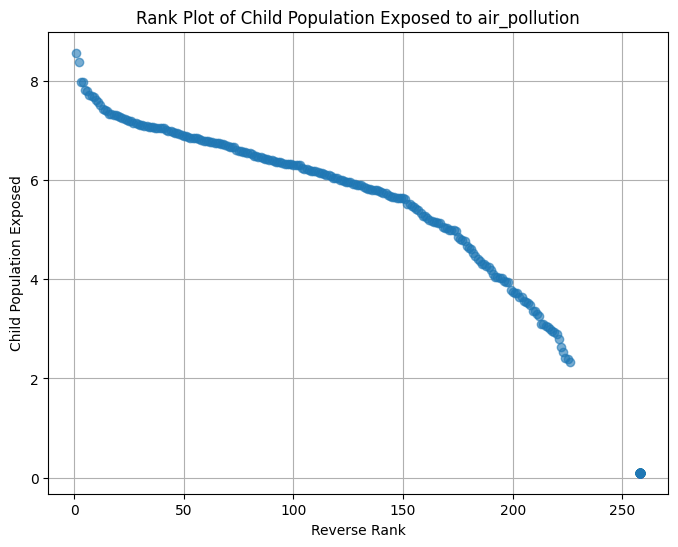

processed : vectorborne_malariapv min: 0.1 max: 8.458361258561188
vectorborne_malariapv: Log Transformation and Scaling - skew=1.805, kurtosis=1.627
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


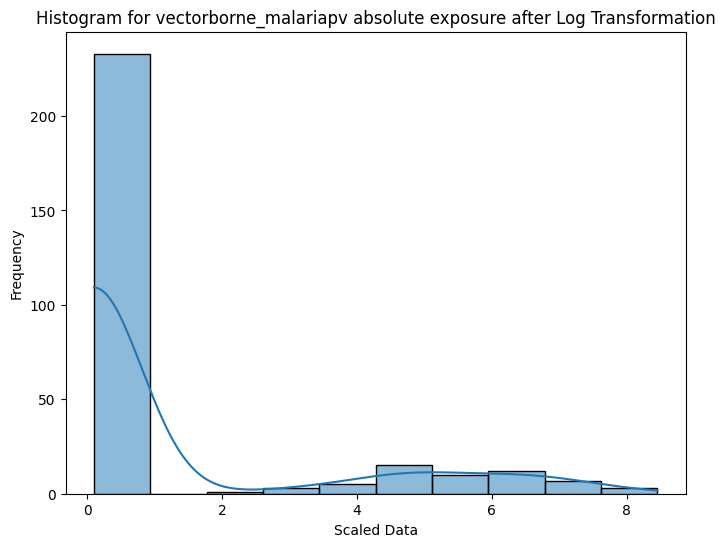

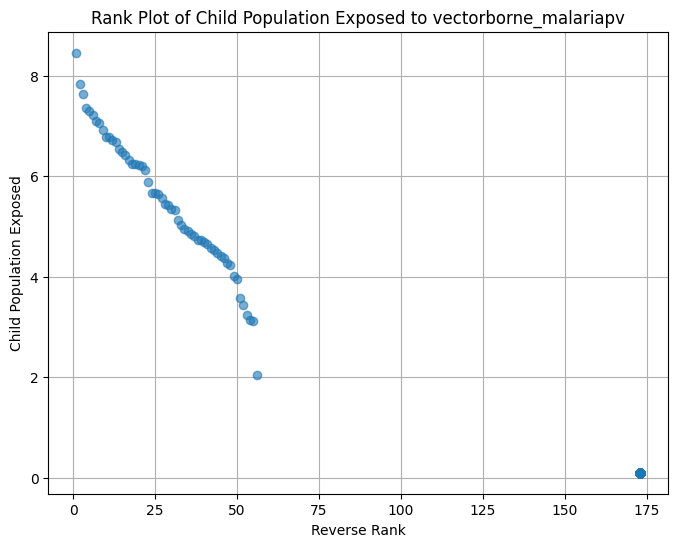

processed : vectorborne_malariapf min: 0.1 max: 7.978834881711023
vectorborne_malariapf: Log Transformation and Scaling - skew=1.041, kurtosis=-0.706
IQR processed : vectorborne_malariapf min: -6.31951018920495 max: 10.799183648674916


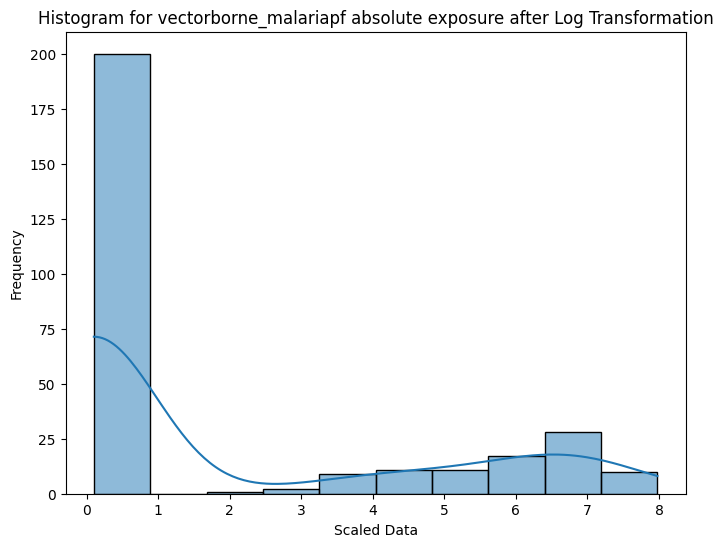

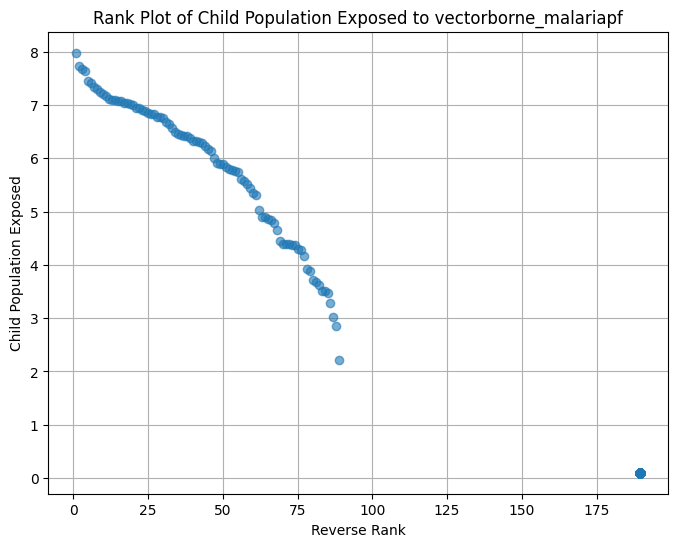

processed : agricultural_drought min: 0.1 max: 8.53347576711074
agricultural_drought: Log Transformation and Scaling - skew=-0.396, kurtosis=-1.554
IQR processed : agricultural_drought min: -9.326397494077828 max: 15.810662490129712


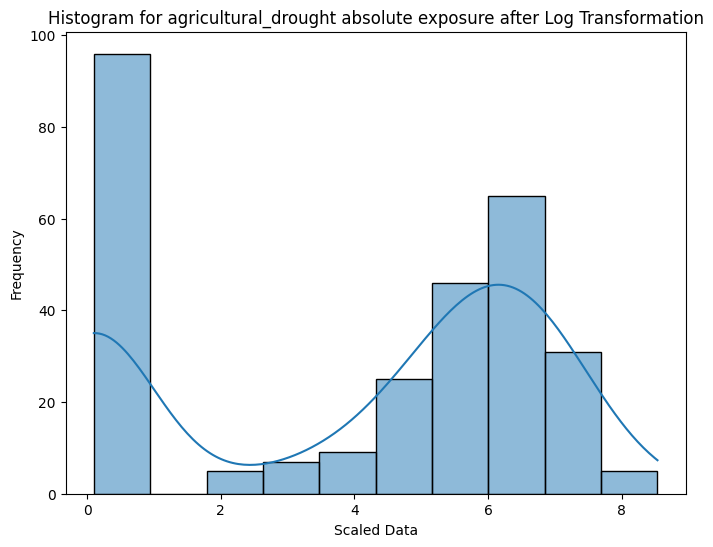

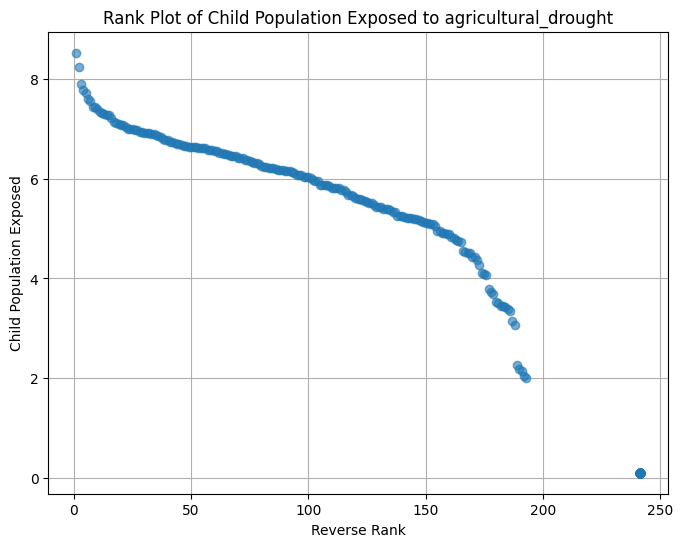

In [9]:

# Define source and destination folder paths
source_folder = "/content/drive/MyDrive/"
destination_folder = "/content/drive/MyDrive/CCRI/pillar2/"

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    if file not in ['/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv', '/content/drive/MyDrive/p1_exposure/p1_p2_avg_ccri.csv','/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv']:
      df = pd.read_csv(file, index_col=None, header=0)
      filename_only = file.split('/')[-1]
      hazard_name = '_'.join(filename_only.split('_')[:2])

      if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
          continue  # Skip files missing required columns

      df = df[['ISO3', 'child_population_exposed']].dropna()

      # Apply iterative trimming
      # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
      df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
      with np.errstate(divide='ignore'):
        df['child_population_exposed'] = np.where(
            df['child_population_exposed'] > 100,
            np.log10(df['child_population_exposed']),
            0.1
        )
      trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
      iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

      print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
      current_skew = skew(trimmed_values)
      current_kurtosis = kurtosis(trimmed_values)
      print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
      print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

      # Plot histogram and normality check
      plt.figure(figsize=(8, 6))
      sns.histplot(df['child_population_exposed'], kde=True)
      plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
      plt.xlabel("Scaled Data")
      plt.ylabel("Frequency")
      plt.show()

      # Compute ranks in reverse order
      df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
      plt.figure(figsize=(8, 6))
      plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
      plt.xlabel("Reverse Rank")
      plt.ylabel("Child Population Exposed")
      plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
      plt.grid(True)
      plt.show()



0.0
100.0
Processed: heatwave_frequency | Min: 6.939939182137827e-05 | Max: 99.99999999999997
heatwave_frequency: Log Transformation - skew=-0.037, kurtosis=-1.387
IQR processed : heatwave_frequency min: -2654828.4139879914 max: 4424714.023313319


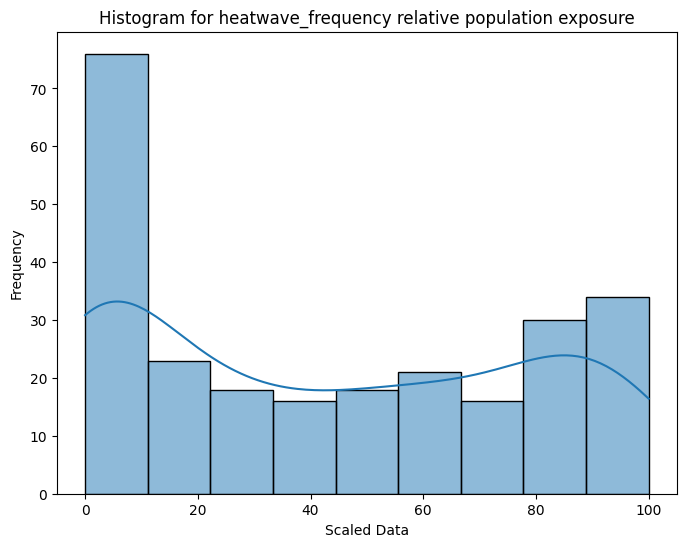

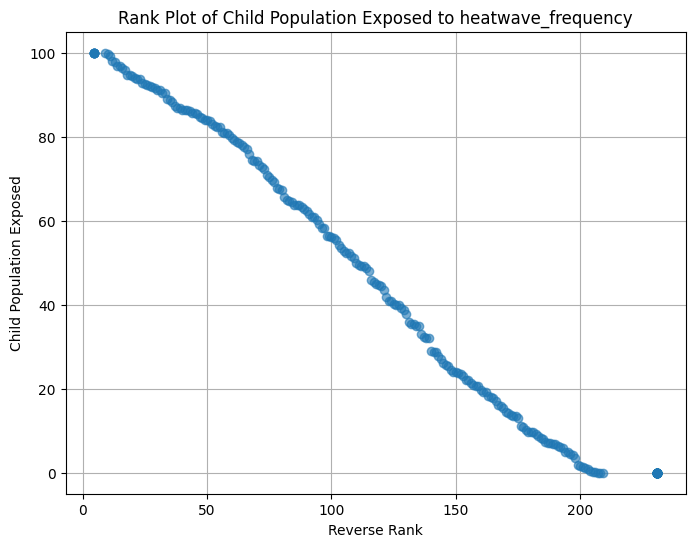

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.010669842259351742 | Max: 100.0
heatwave_duration: Log Transformation - skew=-0.126, kurtosis=-1.214
IQR processed : heatwave_duration min: -3042355.2113114255 max: 5070592.018852375


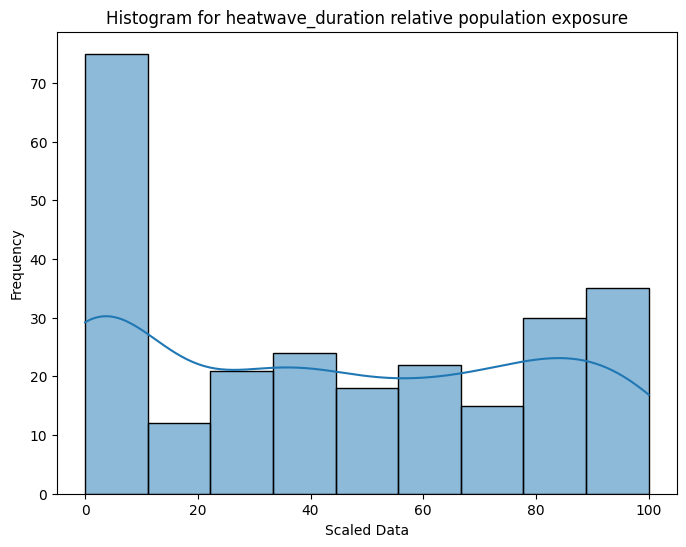

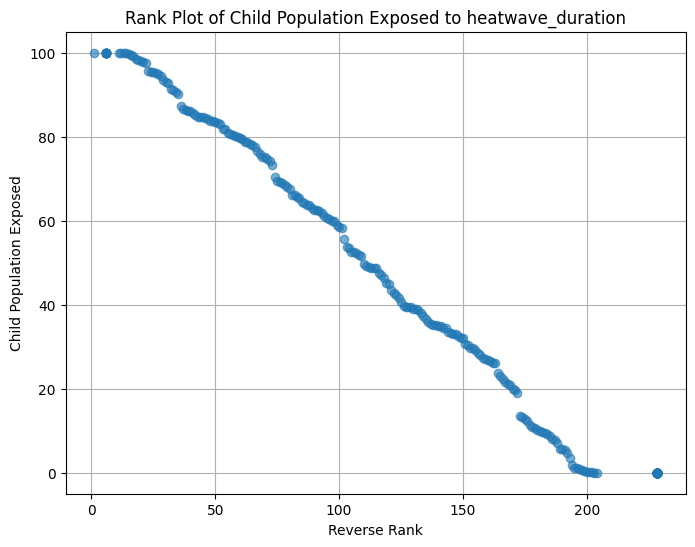

0.0
100.00000000000003
Processed: heatwave_severity | Min: 3.752967696948829e-05 | Max: 100.0
heatwave_severity: Log Transformation - skew=0.024, kurtosis=-1.666
IQR processed : heatwave_severity min: -212096.5535031019 max: 353494.25583850313


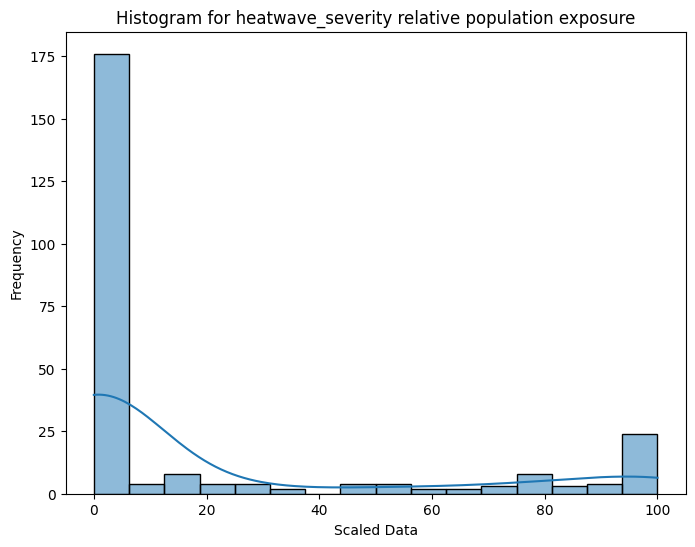

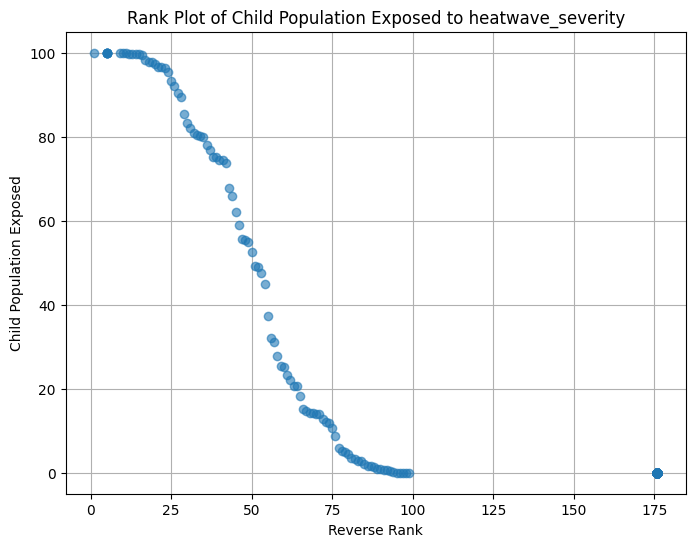

0.0
75.48369050244017
Processed: river_flood | Min: 0.39984364196112165 | Max: 33.5398987500129
river_flood: Log Transformation - skew=1.719, kurtosis=3.309
IQR processed : river_flood min: -304094.4012598505 max: 506824.0020997508


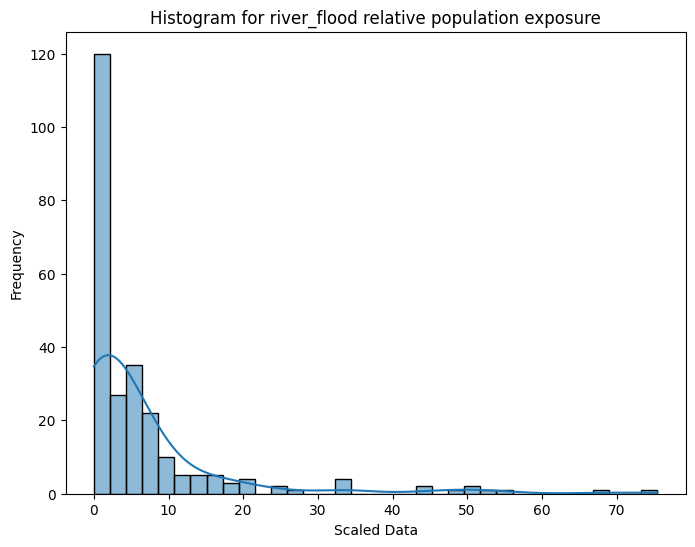

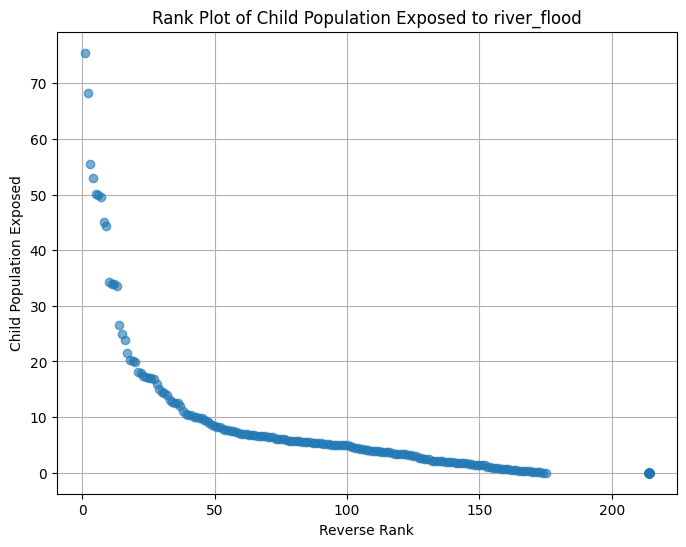

0.0
81.70725270298668
Processed: coastal_flood | Min: 0.021557262934157308 | Max: 3.8296276874285744
coastal_flood: Log Transformation - skew=1.941, kurtosis=3.473
IQR processed : coastal_flood min: -5035.279235028958 max: 8392.132058381598


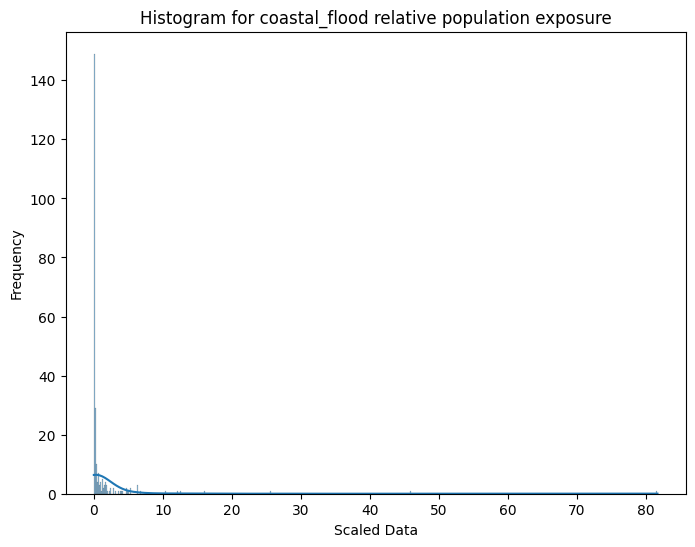

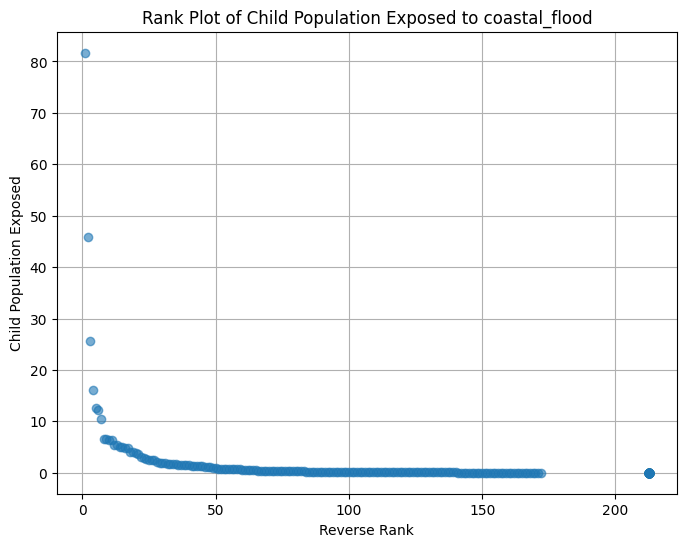

0.0
100.0
Processed: pluvial_flood | Min: 0.4368552112499798 | Max: 99.99981712445631
pluvial_flood: Log Transformation - skew=-0.246, kurtosis=-0.819
IQR processed : pluvial_flood min: -3153671.9485816853 max: 5256119.914302809


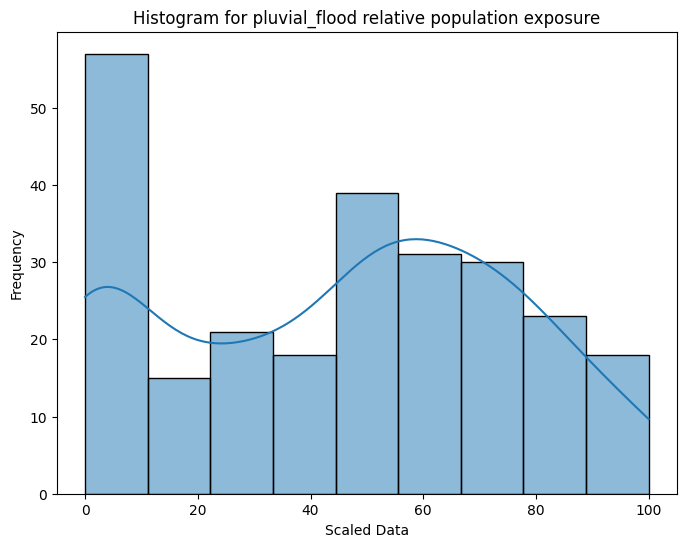

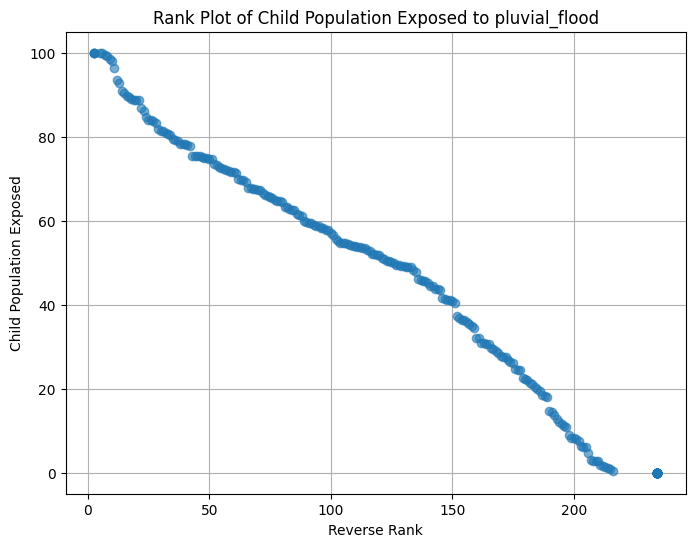

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.3990350283845764e-05 | Max: 100.0
tropical_storm: Log Transformation - skew=-1.248, kurtosis=-0.132
IQR processed : tropical_storm min: -59858.24486225973 max: 99763.74143709955


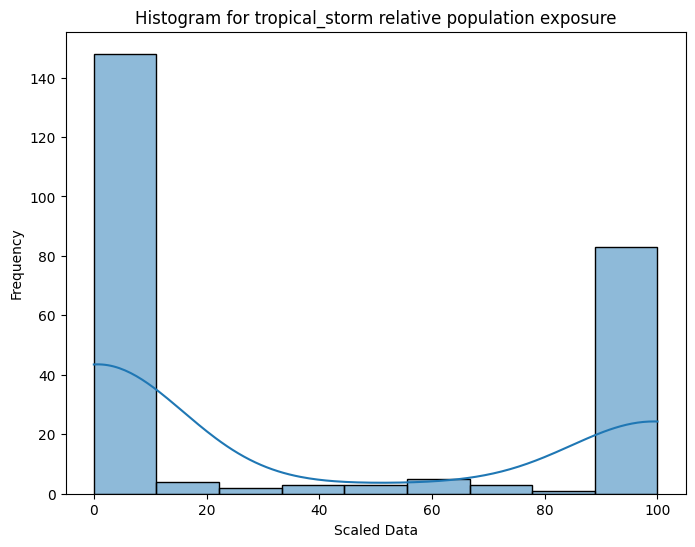

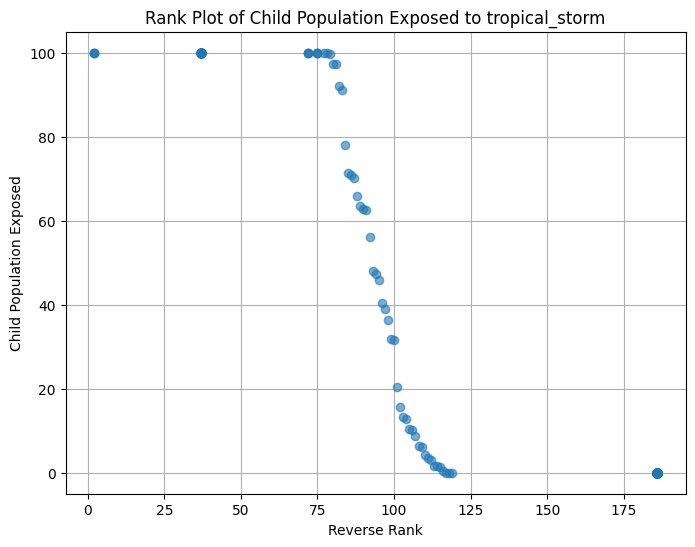

0.0
18.33649070762204
Processed: drought_sma | Min: 0.005940552175943264 | Max: 3.859435424964048
drought_sma: Log Transformation - skew=1.911, kurtosis=3.187
IQR processed : drought_sma min: 0.0 max: 0.0


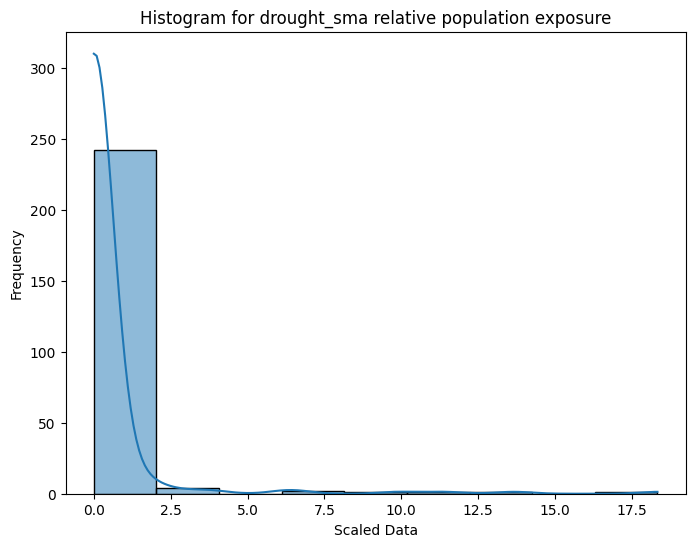

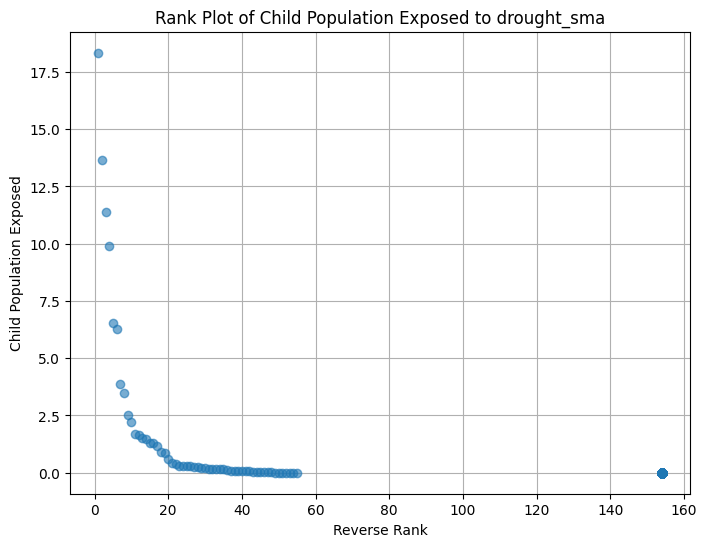

0.0
50.325708279635265
Processed: drought_spi | Min: 0.0015209201555067625 | Max: 4.199289593013662
drought_spi: Log Transformation - skew=1.951, kurtosis=2.649
IQR processed : drought_spi min: -42.058236099779606 max: 70.09706016629934


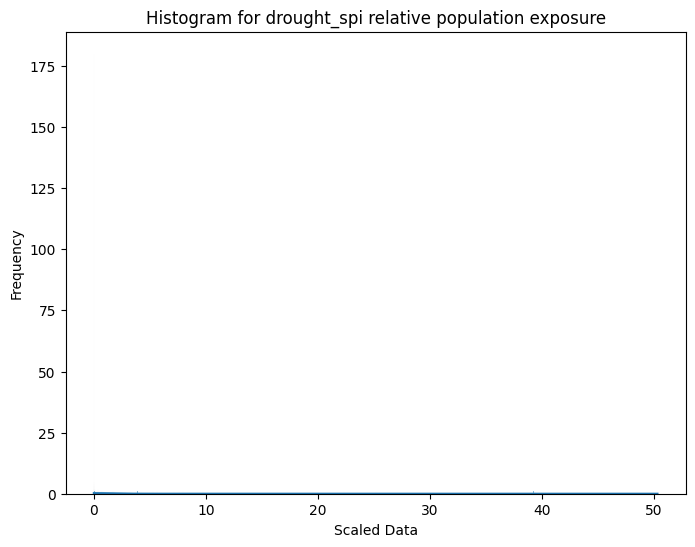

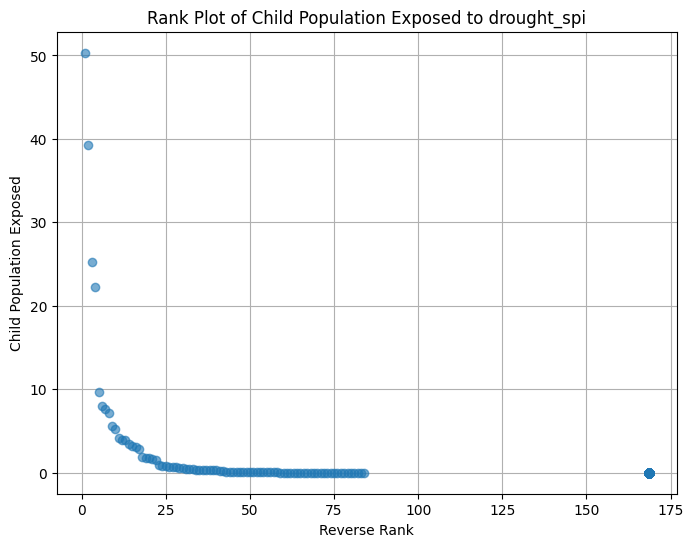

0.0
100.0
Processed: extreme_heat | Min: 0.003628715020401661 | Max: 99.99999999999997
extreme_heat: Log Transformation - skew=0.603, kurtosis=-1.121
IQR processed : extreme_heat min: -364227.580728076 max: 607045.9678801267


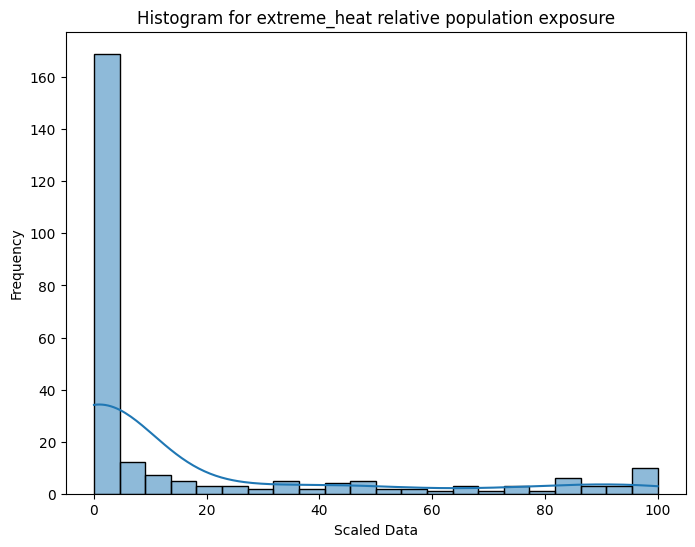

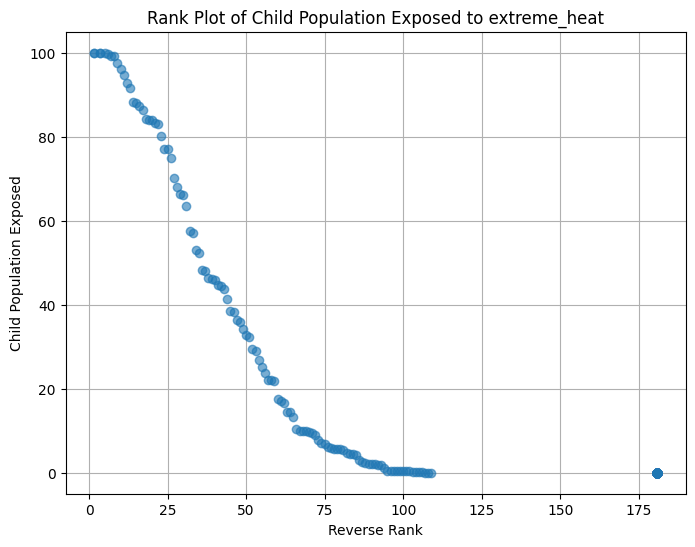

0.0
46.931650624310286
Processed: fire_FRP | Min: 0.04692712091536962 | Max: 11.422762859315085
fire_FRP: Log Transformation - skew=1.702, kurtosis=2.784
IQR processed : fire_FRP min: -109375.97793638436 max: 182293.2965606406


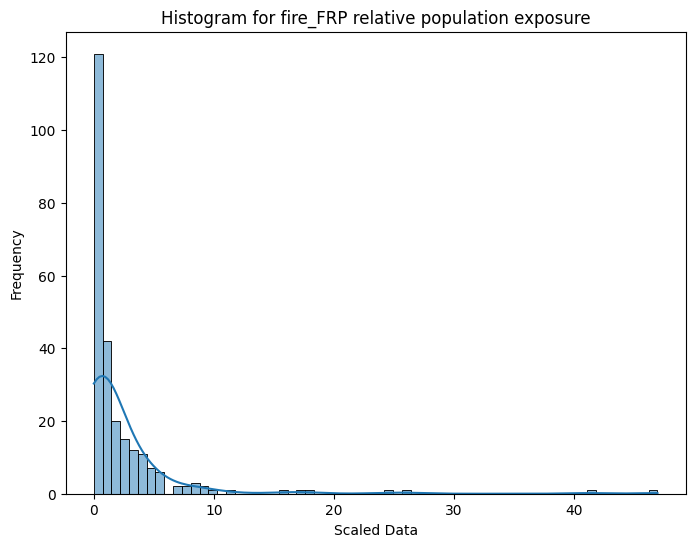

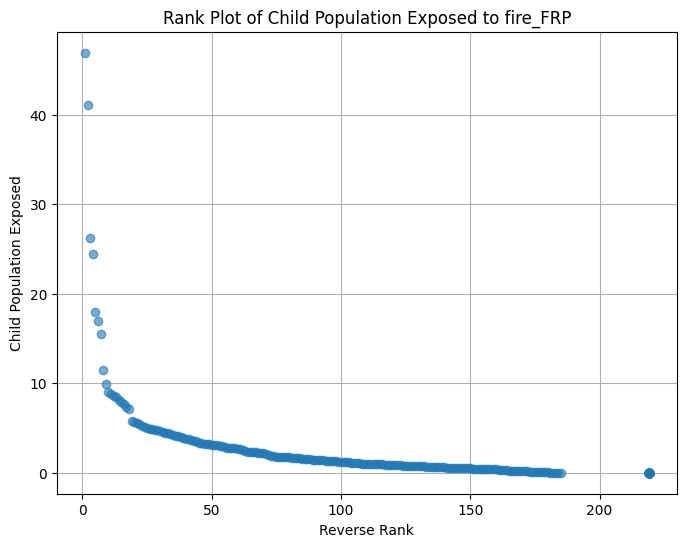

0.0
38.971152663273315
Processed: fire_frequency | Min: 0.007912962628292296 | Max: 3.4635567959867433
fire_frequency: Log Transformation - skew=1.735, kurtosis=2.972
IQR processed : fire_frequency min: -24571.326330798736 max: 40952.21055133123


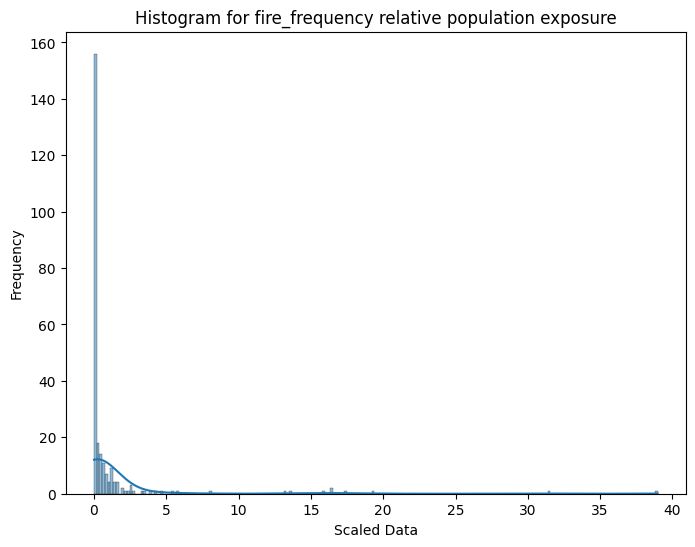

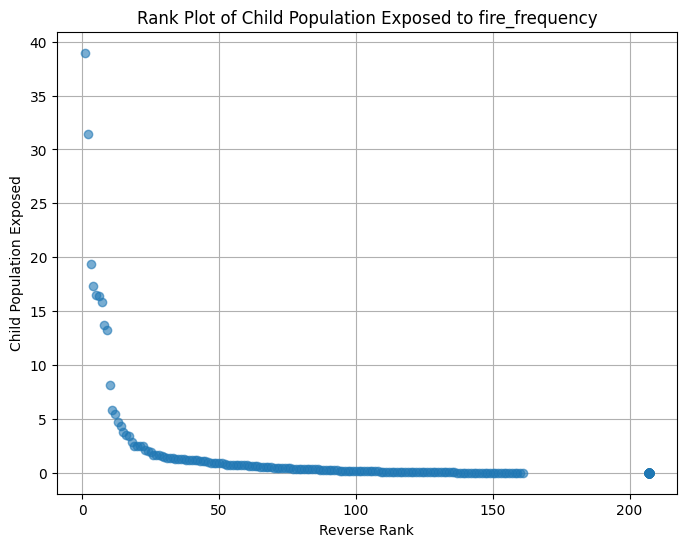

0.0
100.0
Processed: sand_dust | Min: 0.01272968121062298 | Max: 14.97323051775343
sand_dust: Log Transformation - skew=1.948, kurtosis=3.298
IQR processed : sand_dust min: -46733.26262822816 max: 77888.77104704693


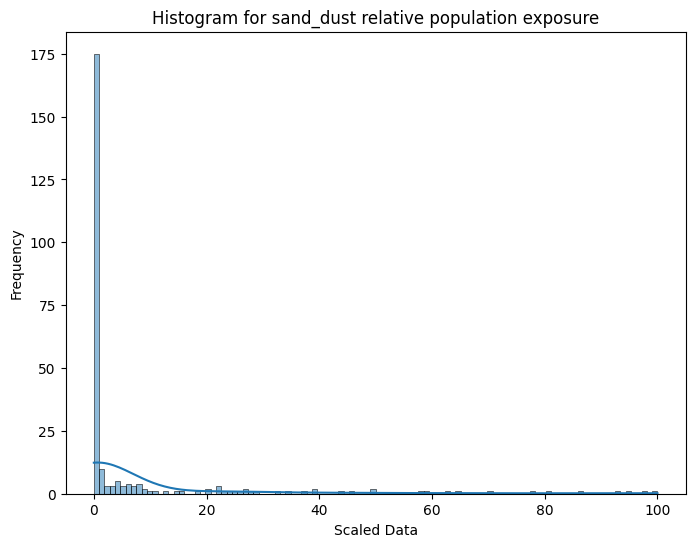

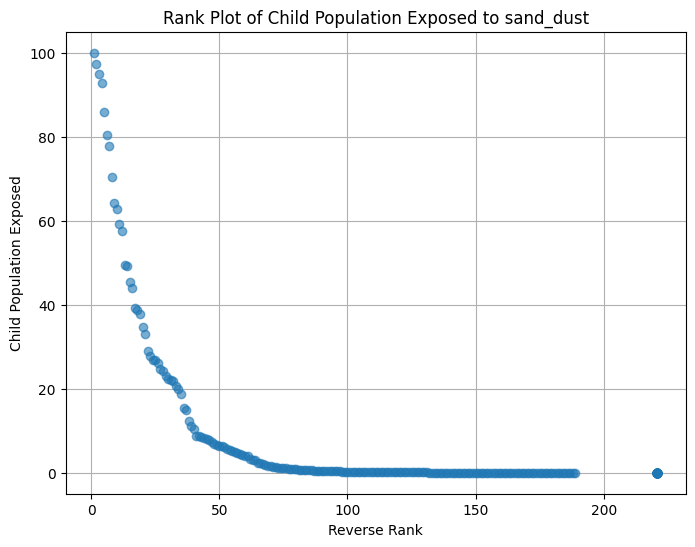

0.0
100.00000000000007
Processed: air_pollution | Min: 0.06325207834241524 | Max: 100.00000000000004
air_pollution: Log Transformation - skew=-1.958, kurtosis=3.250
IQR processed : air_pollution min: -6754113.423566051 max: 11259559.188890927


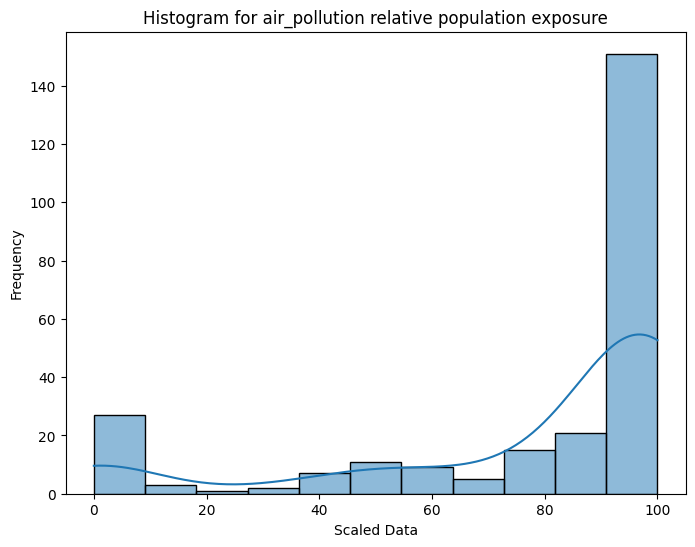

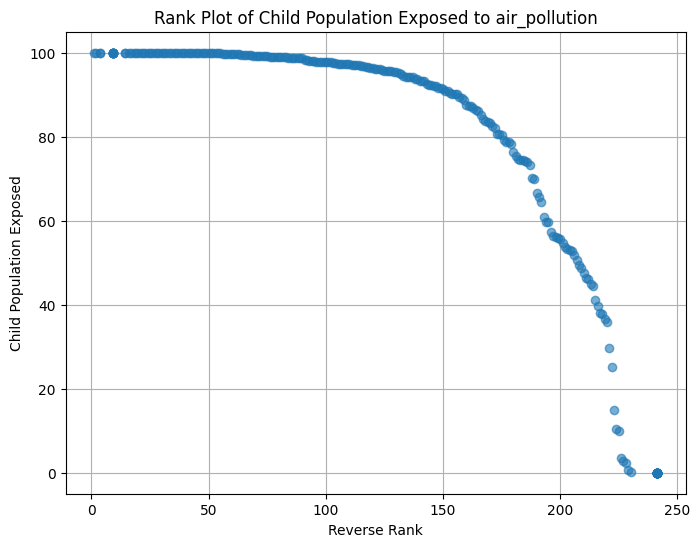

0.0
99.97077475371428
Processed: vectorborne_malariapv | Min: 0.00048132259829387355 | Max: 99.9409684558687
vectorborne_malariapv: Log Transformation - skew=0.524, kurtosis=-1.476
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


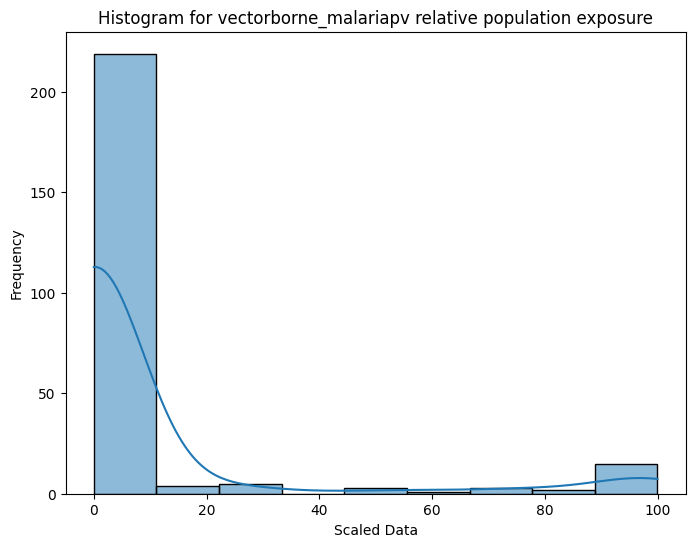

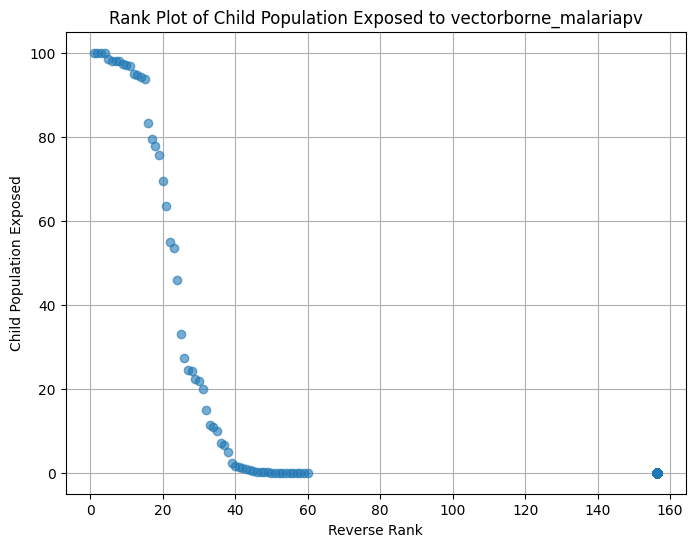

0.0
100.00000000000003
Processed: vectorborne_malariapf | Min: 7.501071777776373e-05 | Max: 99.99999999999997
vectorborne_malariapf: Log Transformation - skew=-0.212, kurtosis=-1.800
IQR processed : vectorborne_malariapf min: -35955.449171677756 max: 59925.74861946293


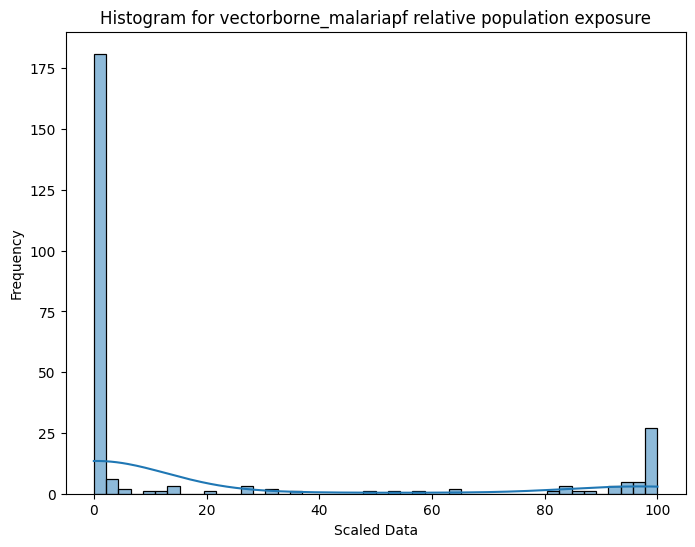

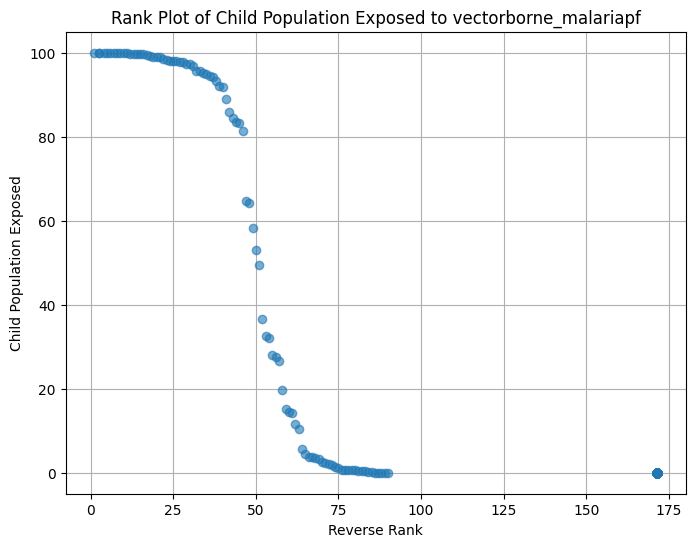

0.0
100.0
Processed: agricultural_drought | Min: 0.0193460210105327 | Max: 97.45977334006744
agricultural_drought: Log Transformation - skew=-0.436, kurtosis=-0.707
IQR processed : agricultural_drought min: -3633760.126860028 max: 6056266.878100047


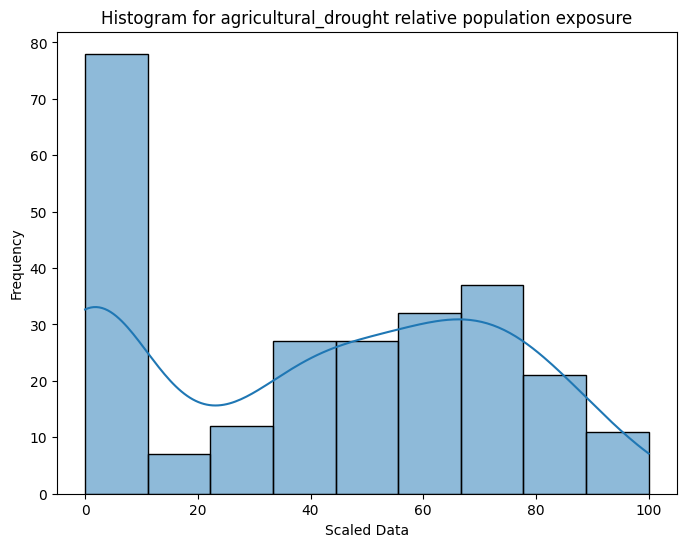

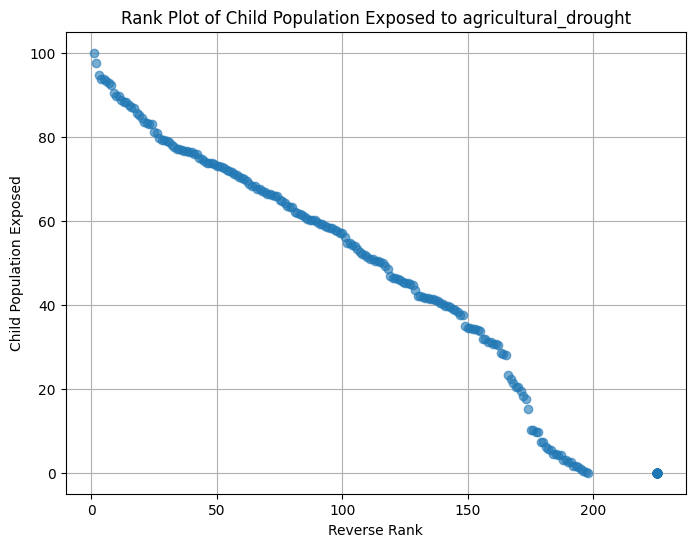

In [10]:

# Load total child population data
total_pop_df = pd.read_csv('/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv', index_col=None, header=0)

if 'ISO3' not in total_pop_df.columns or 'child_population' not in total_pop_df.columns:
    raise ValueError("Total population file is missing required columns: 'ISO3' and 'child_population'.")

# # Dictionary to map total child population by ISO3
# total_population_map = total_pop_df.set_index('ISO3')['child_population'].to_dict()

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    if file in ['/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv', '/content/drive/MyDrive/p1_exposure/p1_p2_avg_ccri.csv','/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv']:
        continue

    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])
    df = df.merge(total_pop_df[['ISO3', 'name', 'child_population']], on=['ISO3', 'name'], how='left')

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed','child_population']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [ ]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"
total_population_file = "/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv"

# Load total child population data
total_pop_df = pd.read_csv(total_population_file, usecols=['ISO3', 'name', 'child_population'])

# Ensure unique ISO3-name pairs before merging
total_pop_df = total_pop_df.groupby(['ISO3', 'name'], as_index=False).agg({'child_population': 'mean'})

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:
    if file == total_population_file:
        continue  # Skip total population file

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'ISO3', 'name', 'child_population_exposed'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)

    # Trim outliers for absolute exposure
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['absolute_exposure'])
    print(f"Processed absolute exposure: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )

    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    # Ensure values are within [0,10]
    df['absolute_value_normalized'] = np.clip(df['absolute_value_normalized'], 0, 10)
    df['absolute_min'] = min_trimmed
    df['absolute_max'] = max_trimmed

    ### **Step 2: Relative Exposure Processing**
    # Merge with total population data
    df = df.merge(total_pop_df, on=['ISO3', 'name'], how='left')

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        0
    )

    # Trim outliers for relative exposure
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_exposure'])
    print(f"Processed relative exposure: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    # Normalize relative exposure
    if min_trimmed != max_trimmed:  # Prevent division by zero
        df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)
    else:
        df['relative_value_normalized'] = 0  # Assign zero if no variation

    df['relative_value_normalized'] = np.clip(df['relative_value_normalized'], 0, 10)
    df['relative_min'] = min_trimmed
    df['relative_max'] = max_trimmed

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'absolute_min': hazard_name + '_absolute_min',
        'absolute_max': hazard_name + '_absolute_max',
        'relative_value_normalized': hazard_name + '_relative',
        'relative_min': hazard_name + '_relative_min',
        'relative_max': hazard_name + '_relative_max'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['ISO3', 'name',
                                  hazard_name + '_absolute', hazard_name + '_absolute_min', hazard_name + '_absolute_max',
                                  hazard_name + '_relative', hazard_name + '_relative_min', hazard_name + '_relative_max']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['ISO3', 'name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Processed absolute exposure: heatwave_frequency | Min: 0.1 | Max: 8.242208888382612
Processed relative exposure: heatwave_frequency | Min: 0.0 | Max: 100.0
Processed absolute exposure: heatwave_duration | Min: 0.1 | Max: 8.406198604340677
Processed relative exposure: heatwave_duration | Min: 0.0 | Max: 100.00000000000003
Processed absolute exposure: heatwave_severity | Min: 0.1 | Max: 7.747777837300412
Processed relative exposure: heatwave_severity | Min: 0.0 | Max: 100.00000000000003
Processed absolute exposure: river_flood | Min: 0.1 | Max: 7.810106640317287
Processed relative exposure: river_flood | Min: 0.39984364196112165 | Max: 33.5398987500129
Processed absolute exposure: coastal_flood | Min: 0.1 | Max: 7.056632617270453
Processed relative exposure: coastal_flood | Min: 0.021557262934157308 | Max: 3.8296276874285744
Processed absolute exposure: pluvial_flood | Min: 0.1 | Max: 8.412208238420407
Processed relative exposure: pluvial_flood | Min: 0.0 | Max: 100.0
Processed absolute 